In [2]:
!pip install pandas_datareader

     ------------------------------------ 109.5/109.5 kB 302.5 kB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

import warnings

warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('MSFT.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [8]:
df.shape

(9083, 7)

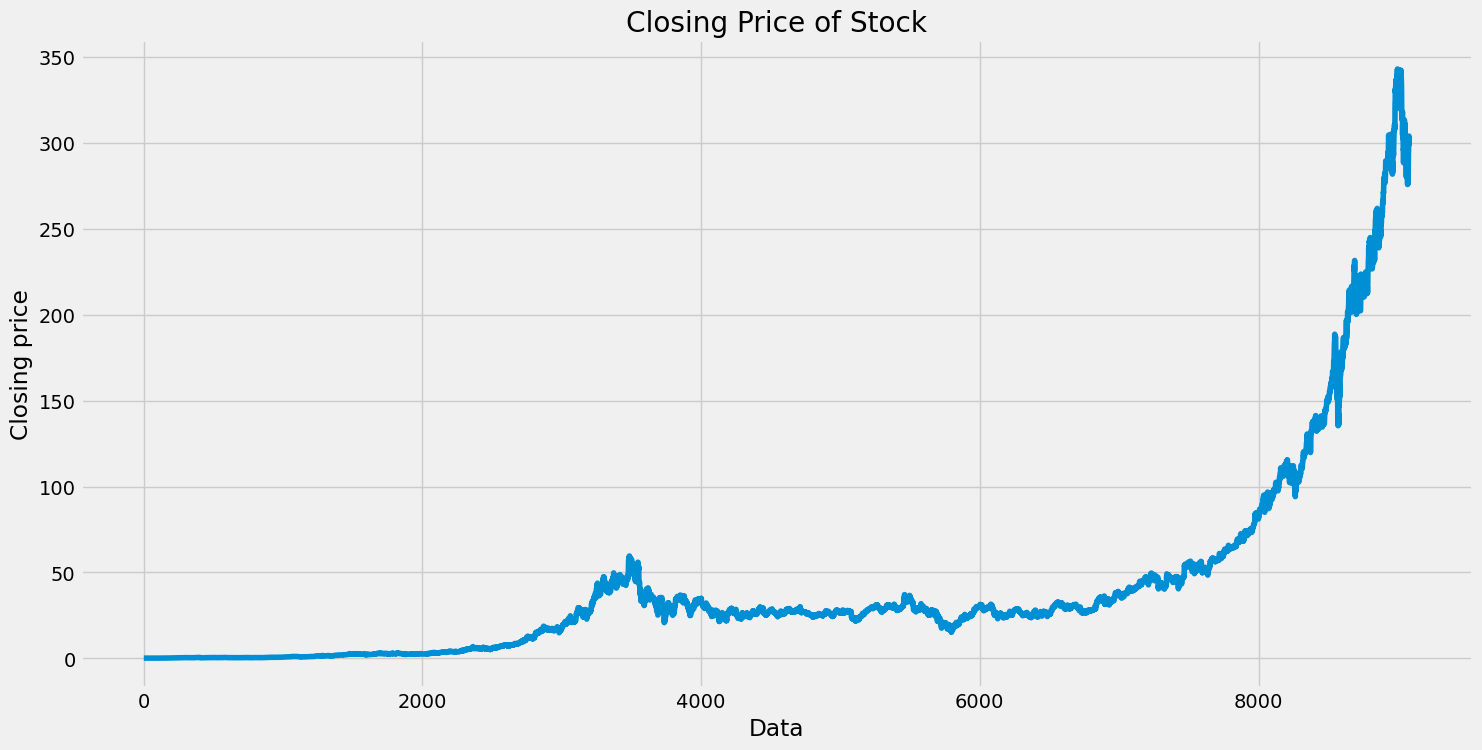

In [9]:
#visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Closing Price of Stock')
plt.plot(df["Close"])
plt.xlabel('Data')
plt.ylabel('Closing price')
plt.show()

In [10]:
#create new database with only required columns
data=df.filter(['Close'])
#convert dataframe to numpy array
dataset = data.values
#get the number of rows to train 80 percent
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

7267

In [11]:
#scale the data
scaler= StandardScaler()
scaled_data=scaler.fit_transform(dataset)
print('MEAN of processed data', scaled_data.mean())
print('Standard deviation of processed data', scaled_data.std())

MEAN of processed data 1.0013153162753806e-16
Standard deviation of processed data 1.0


In [12]:
#create the training data
#create scaled training dataset
train_data= scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])

In [13]:
#convert x_train and y_train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(7207, 60, 1)

In [14]:
#reshape the data
print("x_train shape before reshaping", x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))#np.reshape(x_train,(x_train.shape))
print("x_train shape after reshaping", x_train.shape)

x_train shape before reshaping (7207, 60, 1)
x_train shape after reshaping (7207, 60, 1)


In [15]:
#build LSTH model
model = Sequential()
model.add(LSTM(200, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(200, return_sequences=False))
model.add(Dense(100))
model.add(Dense(90))
model.add(Dense(1))

In [16]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 90)                9090      
                                                                 
 dense_2 (Dense)             (None, 1)                 91        
                                                                 
Total params: 511681 (1.95 MB)
Trainable params: 511681 (1.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
#train the model
history = model.fit(x_train,y_train,epochs=5)

Epoch 1/5
226/226 [==============================] - 53s 209ms/step - loss: 0.0025
Epoch 2/5
226/226 [==============================] - 47s 209ms/step - loss: 2.2529e-04
Epoch 3/5
226/226 [==============================] - 48s 212ms/step - loss: 2.1084e-04
Epoch 4/5
226/226 [==============================] - 49s 216ms/step - loss: 1.8894e-04
Epoch 5/5
226/226 [==============================] - 47s 209ms/step - loss: 1.7293e-04


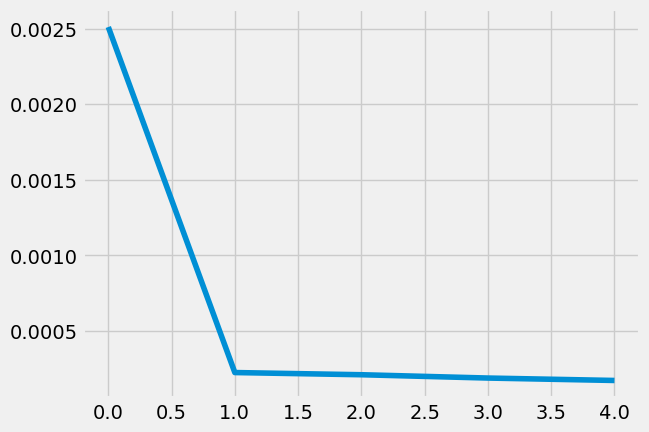

In [19]:
plt.plot(history.history['loss'])

In [20]:
#create the testing dataset
#create new array
test_data=scaled_data[training_data_len-60:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: ,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [21]:
#convert the data to numpy
x_test = np.array(x_test)

In [22]:
#reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [23]:
#get the model predicted value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(predictions)

57/57 [==============================] - 6s 75ms/step
[[ 45.540756]
 [ 45.633736]
 [ 45.82538 ]
 ...
 [248.61792 ]
 [252.04764 ]
 [254.06487 ]]
